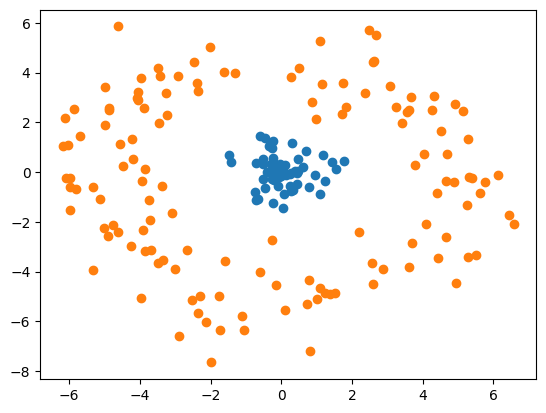

In [43]:
import tools as tl
import matplotlib.pyplot as plt

X, y = tl.gen_simple_circular_distribution(n=200)
plt.scatter(X[y == 0,0],X[y==0,1])
plt.scatter(X[y == 1,0],X[y==1,1])


In [44]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
import numpy as np

Xgrid, x1line,x2line  = tl.gen_sample_grid(limit =10)

In [45]:
# set up the sequential neural network
model = Sequential()

# add the layers
model.add(Dense(units=4, activation = 'relu', input_dim=2))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='sgd')

y_binary = to_categorical(y)

model.fit(X,y_binary, epochs=250,batch_size=32)

Epoch 1/250
7/7 [==============================] - 1s 4ms/step - loss: 0.4658
Epoch 2/250
7/7 [==============================] - 0s 2ms/step - loss: 0.4512
Epoch 3/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4393
Epoch 4/250
7/7 [==============================] - 0s 596us/step - loss: 0.4302
Epoch 5/250
7/7 [==============================] - 0s 2ms/step - loss: 0.4218
Epoch 6/250
7/7 [==============================] - 0s 2ms/step - loss: 0.4155
Epoch 7/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4087
Epoch 8/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4032
Epoch 9/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3978
Epoch 10/250
7/7 [==============================] - 0s 2ms/step - loss: 0.3932
Epoch 11/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3886
Epoch 12/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3848
Epoch 13/250
7/7 [==============================] - 0s 3ms/

1250/1250 [==============================] - 2s 2ms/step
(200, 200)


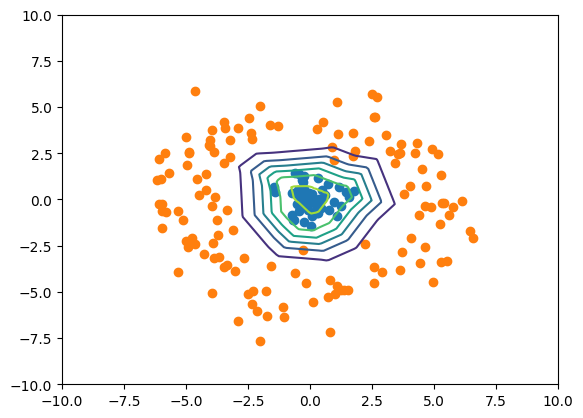

In [47]:
# predicted the model onto a Xgrid
predicted_grid = model.predict(Xgrid)

# why is there two outputs in predicted grid I do not understand
predicted_grid = np.reshape(predicted_grid[:,0], [200,200])
print(np.shape(predicted_grid))

plt.contour(x1line,x2line,predicted_grid)
plt.scatter(X[y == 0,0],X[y==0,1])
plt.scatter(X[y == 1,0],X[y==1,1])


In [48]:
# save the model
model.save('Circular data set.h5')

C:\Users\janse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
